# Ex 1

Scrieţi un program în Python care să preia ca input un fişier .csv cu o listă oarecare şi să aibă ca output un număr
predeterminat de elemente din **acea** listă, fără repetiţie. Aplicaţi pe lista studenţilor din grupa dumneavoastră care nu
au prezentat încă o temă.

**Notă:** Pentru generarea unui eşantion aleator se poate apela funcţia sample din modulul random sau funcţia ran-
dom.choice cu argumentul replace=False din librăria Numpy.

In [3]:
from google.colab import files
uploaded = files.upload()


Saving students_without_homework.csv to students_without_homework.csv


In [4]:
import csv
import random


# Function for a random sample from a csv file

def random_sample(file_path, num):
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        our_list = [row[0] for row in reader]  # Our csv has only one row

    # Validation stage
    if num > len(our_list):
       raise ValueError(f"I can't give you {num} distinct elements out of {len(our_list)} elements!")

    sample = random.sample(our_list, num)

    return sample


# Get a set of random students from our file

file_path = 'students_without_homework.csv'
num_elements = 4
sample = random_sample(file_path, num_elements)

print("Students selected for next homework:")
for student in sample:
    print(student)



Students selected for next homework:
Student 5
Student 7
Student 11
Student 16


# Ex 2

**Ex. 2**. Doi prieteni joacă următorul joc, după următoarele reguli:

**Pasul 1**. Primul jucător aruncă cu o monedă.


*   Dacă pică stemă, cel de-al doilea trebuie să arunce cu zarul şi să-i dea primului o sumă egală z − 3 \$, unde z
este rezultatul aruncării cu zarul (a da o sumă negativă este echivalent cu a lua opusul acelei sume). Jocul
se încheie aici.
*   Dacă pică ban, atunci primul jucător trebuie să-i dea celui de-al doilea 0.5 \$.

**Pasul n.** În caz că jocul nu s-a încheiat, se reia pasul 1.
Astfel, jocul se opreşte la pasul corespunzător obţinerii stemei de către primul jucător.

a) Ce fel de distribuţie urmează N, numărul de paşi ai jocului?

N este o **distribuitie geometrica** intrucat jocul poate fi descris drept o secventa de evenimente independente, fiecare eveniment avand probabilitatea de succes egala cu 0.5, conditia de finalizare a jocului fiind obtinerea primul succes (aruncarea stemei).

b) Simulaţi în Python un astfel de joc. Variabilele care ne interesează sunt N şi suma totală S pe care cel de-al doilea jucător trebuie să i-o dea primului.

In [15]:
import random

def game():
    N = 0
    S = 0

    while True:
        N += 1
        coin = random.choice(['stema', 'ban'])
        print(f"{coin}")

        if coin == 'ban':
            dice = random.randint(1, 6)
            sum_dice = dice - 3
            S += sum_dice
            print(f"dice: {dice}, sum: {sum_dice}, debt: {S}")
            continue
        else:
            S -= 0.5  # 2nd player recieves money, so his debt is reduced
            break

    return N, S


# Game simulation

N, S = game()
print(f"Number of steps (N): {N}")
print(f"2nd player's debt (S): {S}$")


ban
dice: 2, sum: -1, debt: -1
stema
Number of steps (N): 2
2nd player's debt (S): -1.5$


c) Prin simularea unui număr mare de astfel de jocuri, determinaţi cu aproximaţie media lui S şi reprezentaţi grafic (printr-o histogramă) distribuţia acesteia.

The mean of 100 games is: -0.06



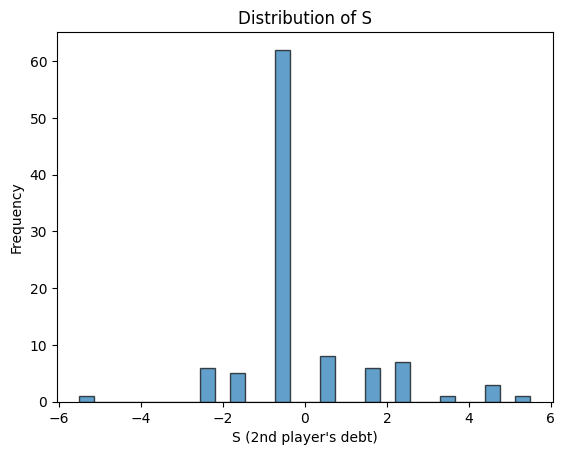

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt

def game():
    N = 0
    S = 0

    while True:
        N += 1
        coin = random.choice(['stema', 'ban'])

        if coin == 'ban':
            dice = random.randint(1, 6)
            sum_dice = dice - 3
            S += sum_dice
            continue
        else:
            S -= 0.5  # 2nd player recieves money, so his debt is reduced
            break

    return S


def game_simulations(num):
    results = []
    for _ in range(num):
        S = game()
        results.append(S)
    return results



# Statistics

num = 100
results = game_simulations(num)

mean = np.mean(results)
print(f"The mean of {num} games is: {mean}\n")

# Histogram
plt.hist(results, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of S")
plt.xlabel("S (2nd player's debt)")
plt.ylabel("Frequency")
plt.show()


d) Ce se întâmplă dacă moneda este măsluită? Încercaţi să refaceţi pct c) cu o probabilitate de apariţie a stemei p = 0.3, respectiv p = 0.7.

Thea mean of S for p_ban = 0.3 after 100 games is: -0.22



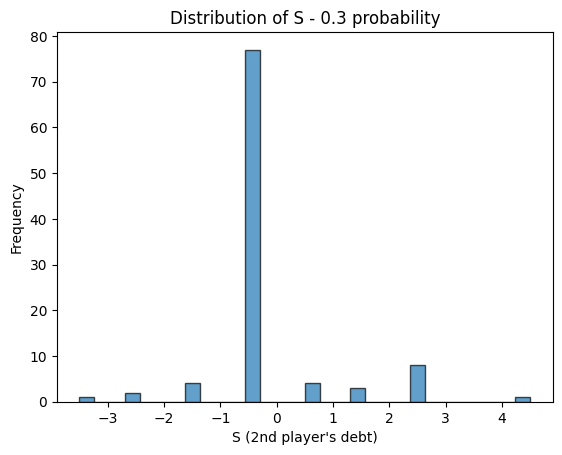


The mean of S for p_ban = 0.7 after 100 games is: 0.43



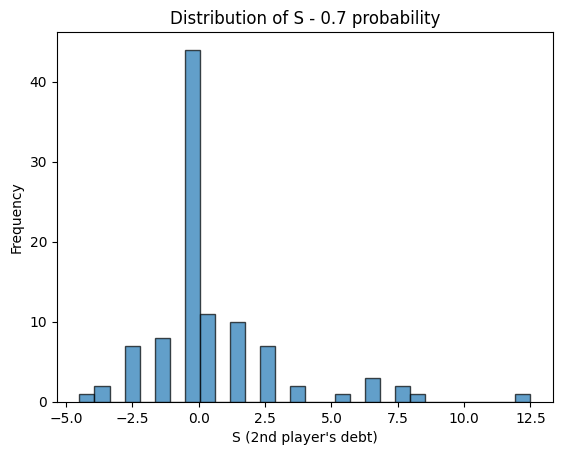

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

def unfair_game(p_stema):
    N = 0
    S = 0

    while True:
        N += 1
        coin = 'ban' if random.random() < p_stema else 'stema'  # unfair coin

        if coin == 'ban':
            dice = random.randint(1, 6)
            sum_dice = dice - 3
            S += sum_dice
            continue
        else:
            S -= 0.5  # 2nd player recieves money, so his debt is reduced
            break

    return S


def unfair_game_simulations(num, p_stema):
    results = []
    for _ in range(num):
        S = unfair_game(p_stema)
        results.append(S)
    return results



# New statistics


num = 100

# Probability is 0.3
p_ban = 0.3
results_03 = unfair_game_simulations(num, p_ban)
mean_03 = np.mean(results_03)
print(f"Thea mean of S for p_ban = 0.3 after {num} games is: {mean_03}\n")

# Histograma
plt.hist(results_03, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of S - 0.3 probability")
plt.xlabel("S (2nd player's debt)")
plt.ylabel("Frequency")
plt.show()


# Probability is 0.7
p_ban = 0.7
results_07 = unfair_game_simulations(num, p_ban)
mean_07 = np.mean(results_07)
print(f"\nThe mean of S for p_ban = 0.7 after {num} games is: {mean_07}\n")

# Histogram
plt.hist(results_07, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of S - 0.7 probability")
plt.xlabel("S (2nd player's debt)")
plt.ylabel("Frequency")
plt.show()

# Ex 3

Într-o frizerie, trei frizeri îşi tund clienţii cu următoarele viteze medii: primul cu 3 clienţi pe oră, al doilea cu 6 pe
oră iar al treilea cu 4 pe oră. Astfel, timpul de servire al unui client este modelat de distribuţii exponenţiale cu parametrii
λ1 = 3 h^(−1), λ2 = 6 h^(−1), respectiv λ3 = 4 h^(−1), iar probabilităţile de preluare a unui client de către un anumit frizer sunt 3/13, 6/13, respectiv 4/13 (de ce?). Fie X timpul de servire pentru un client.

Generaţi 10000 de valori pentru X, şi în felul acesta estimaţi media şi deviaţia standard a lui X. Realizaţi un grafic
aproximativ al densităţii distribuţiei lui X.

**Notă**: Distribuţia Exp(λ) se poate apela prin random.exponential(scale=1/λ) în Numpy, sau cu stats.expon(scale=1/λ) în Scipy. Având în vedere că X are o distribuţie continuă, densitatea aproximativă acesteia se poate vizualiza folosind
funcţia plot_kde din librăria Arviz.

Mean of client time X: 0.23070076853322094
Standard deviation of client time X: 0.2493674330985851



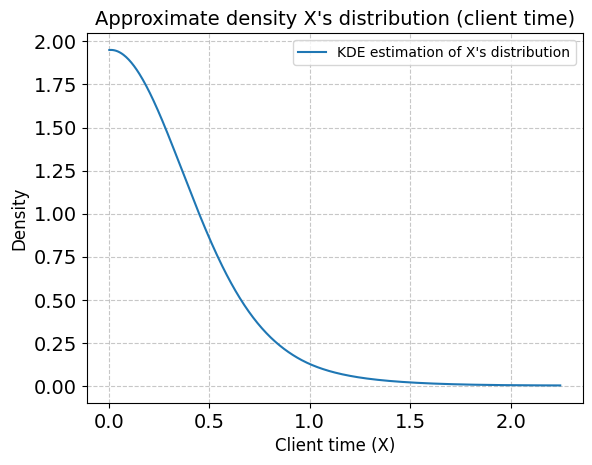

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az


# Parameters of exponential distribution for each barber
lambda1 = 3
lambda2 = 6
lambda3 = 4

barber_probabil = [3/13, 6/13, 4/13]


# Generate X for each client

num = 10000
values_X = []

for _ in range(num):

    chosen_barber = np.random.choice([1, 2, 3], p=barber_probabil)

    if chosen_barber == 1:
        client_time = np.random.exponential(scale=1/lambda1)
    elif chosen_barber == 2:
        client_time = np.random.exponential(scale=1/lambda2)
    else:
        client_time = np.random.exponential(scale=1/lambda3)

    values_X.append(client_time)



# Statistics

values_X = np.array(values_X)

mean_X = np.mean(values_X)
std_dev_X = np.std(values_X)

print(f"Mean of client time X: {mean_X}")
print(f"Standard deviation of client time X: {std_dev_X}\n")

# Diagram
az.plot_kde(values_X, bw=0.3, label='KDE estimation of X\'s distribution')

plt.title("Approximate density X's distribution (client time)", fontsize=14)
plt.xlabel("Client time (X)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
